# Geospatial Standards and Formats

## **Part A. Read and Query Data**

---



> First we will import all the required packages required for this assignment.

In [ ]:
# Importing the pandas and geopandas package
import pandas as pd
import geopandas as gpd

#### 1. What is (are) the name(s) of the Aboriginal Lands (AL_TA_NB_2_143_eng) within York County?



In [ ]:
# To display all the columns whenever .head() is used
pd.options.display.max_columns = None



> Reading the .shp files in GeoDataFrames.





In [ ]:
# Reading the .shp files in GeoDataFrames.

abl = gpd.read_file('/content/drive/MyDrive/Colab Notebooks/data/AL_TA_NB_2_143_eng.shp')
county = gpd.read_file('/content/drive/MyDrive/Colab Notebooks/data/geonb_county.shp')



> Now, we will check if the CRS of both GeoDataFrames abl and county is same or not. 





In [ ]:
abl.crs

<Geographic 2D CRS: GEOGCS["GCS_North_American_1983_CSRS98",DATUM["D_N ...>
Name: GCS_North_American_1983_CSRS98
Axis Info [ellipsoidal]:
- lon[east]: Longitude (Degree)
- lat[north]: Latitude (Degree)
Area of Use:
- undefined
Datum: D_North_American_1983_CSRS98
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [ ]:
county.crs

<Derived Projected CRS: EPSG:2953>
Name: NAD83(CSRS) / New Brunswick Stereographic
Axis Info [cartesian]:
- N[north]: Northing (metre)
- E[east]: Easting (metre)
Area of Use:
- name: Canada - New Brunswick.
- bounds: (-69.05, 44.56, -63.7, 48.07)
Coordinate Operation:
- name: New Brunswick Stereographic (NAD83)
- method: Oblique Stereographic
Datum: NAD83 Canadian Spatial Reference System
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

> To perform operations, both .shp files should be using same CRS.

In [ ]:
# Converting AL_TA_NB_2_143_eng to EPSG:2953
abl_2953 = abl.to_crs('EPSG:2953')

In [ ]:
#iloc uses the row with york county i.e row 0
abl_york = abl_2953[abl_2953.within(county.geometry.iloc[0])]

# This displays the names of Aboriginal Lands within York county.
abl_york.loc[:,'NAME1'].head()

19     KINGSCLEAR INDIAN RESERVE NO. 6
23    ST. MARY'S INDIAN RESERVE NO. 24
24         DEVON INDIAN RESERVE NO. 30
Name: NAME1, dtype: object

####2. In the FloodExtent file, what is the maximum water level recorded?

> We will read te .shp file into a GeoDataFrame and then get the max level using the column which has the values of water levels

In [ ]:
# Reading the .shp file
fle = gpd.read_file('/content/drive/MyDrive/Colab Notebooks/data/Flood_Extent_2018_LowerSaintJohn.shp')

In [ ]:
# To find out the column name. We can also use .columns() as an alternative.
fle.head()

,OBJECTID_2,OBJECTID_3,OBJECTID,Id,gridcode,Vertical_D,Water_Time,Water_Leve,Shape_Leng,Station_ID,Shape_Le_1,Shape_Le_2,Shape_Area,geometry
0,1,71,73,1,1,CGVD2013,7700,7.7,4.0,130492.1,4.0,4.0,1.0,"POLYGON ((2489393.000 7441437.000, 2489393.000..."
1,2,72,74,3,1,CGVD2013,7700,7.7,8.0,130492.1,8.0,8.0,3.0,"POLYGON ((2489337.000 7441420.000, 2489336.000..."
2,3,73,75,4,1,CGVD2013,7700,7.7,8.0,130492.1,8.0,8.0,3.0,"POLYGON ((2489333.000 7441416.000, 2489332.000..."
3,4,74,76,5,1,CGVD2013,7700,7.7,14.0,130492.1,14.0,14.0,8.0,"POLYGON ((2489399.000 7441409.000, 2489398.000..."
4,5,75,77,6,1,CGVD2013,7700,7.7,4.0,130492.1,4.0,4.0,1.0,"POLYGON ((2489402.000 7441408.000, 2489401.000..."


In [ ]:
# This method will query the column and return the maximum value.
fle['Water_Leve'].max()

10.7

####3. In the FloodExtent file, what is the maximum water level recorded in Sunbury County (geonb_county)?

> We will check the crs of both files and then convert it (if required). 


In [ ]:
# Returns the CRS
fle.crs

<Compound CRS: COMPD_CS["NAD83(CSRS) / New Brunswick Stereographi ...>
Name: NAD83(CSRS) / New Brunswick Stereographic + CGVD2013(CGG2013) height
Axis Info [cartesian|vertical]:
- [north]: Northing (metre)
- [east]: Easting (metre)
- [up]: Gravity-related height (metre)
Area of Use:
- undefined
Datum: NAD83 Canadian Spatial Reference System
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich
Sub CRS:
- NAD83(CSRS) / New Brunswick Stereographic
- CGVD2013(CGG2013) height

In [ ]:
# Converting the fle CRS to EPSG:2953 which matches the county CRS
fle_2953 = fle.to_crs('EPSG:2953')

> .within() operation filters the data to only include features in Sunbury County using the iloc which uses the row from county gdf. To get the maximum water level. max() method is used 

In [ ]:
# Sunbury county is row 1
result = fle_2953[fle_2953.within(county.geometry.iloc[1])]

In [ ]:
# Returns the maximum water level
result["Water_Leve"].max()

7.3

####4. What is the total Length of Roads in Sunbury and York counties (in kilometres, rounded to 2 decimals)?

> Read the file and then we will group by county to use it for caculations

In [ ]:
# Reading the file into a gdf
roads = gpd.read_file('/content/drive/MyDrive/Colab Notebooks/data/geonb_roads_SunburyYork.shp')

# Grouping it by county
by_county = roads.groupby("COUNTY")

In [ ]:
#Calculate total length of roads in Sunbury and York counties
sunbury_length = by_county.get_group("Sunbury")["geometry"].length.sum()/1000
york_length = by_county.get_group("York")["geometry"].length.sum()/1000

> Rounding the values to 2 decimals

In [ ]:
# Rounded to 2 decimals for Sunbury county
round(sunbury_length,2)

1103.08

In [ ]:
# Rounded to 2 decimals for York county
round(york_length,2)

3045.49

In [ ]:
# Total length of roads for both counties and rounded to 2 decimals
round(sunbury_length + york_length,2)

4148.57

####5. Select all the roads from GeoNB Roads_SunburyYork which have a Street name of “Waterloo Row”.




##### a. Print how many roads are selected.

> Firstly, we will select all the roads & convert it to lower case to avoid missing any road with different case.

In [ ]:
# Filter the selected road 'waterloo row'
selected_roads = roads[roads['STREETNAME'].str.lower() == 'waterloo row']

In [ ]:
# Returns the number of selected roads
len(selected_roads)

16

##### b. Dissolve all roads with the name Waterloo Row into 1 feature.

> We will use .dissolve method on selected_roads which has data of 'waterloo row' to dissolve it into one feature.

In [ ]:
# STREETNAME is the column used for dissolving
dissolved = selected_roads.dissolve(by='STREETNAME')

In [ ]:
# Returns the output data in as one row
dissolved.head()

,geometry,NID,ROADSEGID,ST_TYPE,TYPE_POSI,PREFIX,SUFFIX,NBRLANES,RTENAME1EN,RTENAME2EN,RTENAME1FR,RTENAME2FR,RTNUMBER1,RTNUMBER2,STRUNAMEEN,STRUNAMEFR,STRUCTTYPE,EXITNBR,SPEED_L,SPEED_R,SPEED,SPEED_SR,ROADCLASS,PAVSTATUS,PAVSURF,UNPAVSURF,TRAFFICDIR,CLOSING,L_HNUMSTR,R_HNUMSTR,L_HNUMF,L_HNUML,R_HNUMF,R_HNUML,PLACE_NAME,COUNTY
STREETNAME,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
WATERLOO Row,"MULTILINESTRING ((2489498.504 7438457.000, 248...",56FA442F6D624B78A63E3B1EE3BE4D3F,11045501,Row,S,None,None,1,None,None,None,None,None,None,None,None,None,None,-1,-1,50,NBDTI Sign Data,NBDOT Local Named,Paved,Flexible,None,Same Direction,Unknown,None,None,0,0,0,0,Fredericton,York


##### c. Write the dissolved roads to a GeoJSON file

> Writing to a GeoJSON file using .tofile method

In [ ]:
# Driver defines the type of file.
dissolved.to_file('/content/drive/MyDrive/Colab Notebooks/waterloo_row.geojson', driver='GeoJSON')

> Firstly we will import the required packages and modules.

## **Part B. Create data and buffer**

---



In [ ]:
# Importing Point from shapely.geometry to reduce memory consumption
from shapely.geometry import Point

#### 6. Create a Point Feature at Fredericton International Airport: 45.87286, -66.52982 (EPSG:4326)

In [ ]:
# Creates a Point for Fredericton International Airport.
coords = Point(-66.52982, 45.87286)

In [ ]:
# Assigns the CRS EPSG:4326
airport = gpd.GeoDataFrame(geometry=[coords], crs='EPSG:4326')

In [ ]:
# Lists the CRS info of the airport gdf
airport.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

####7. What is the coordinate system used in the GeoNB Roads_SunburyYork file?

In [ ]:
# Returns the CRS information of the GeoNB Roads_SunburyYork.shp file
roads.crs

<Derived Projected CRS: EPSG:2953>
Name: NAD83(CSRS) / New Brunswick Stereographic
Axis Info [cartesian]:
- N[north]: Northing (metre)
- E[east]: Easting (metre)
Area of Use:
- name: Canada - New Brunswick.
- bounds: (-69.05, 44.56, -63.7, 48.07)
Coordinate Operation:
- name: New Brunswick Stereographic (NAD83)
- method: Oblique Stereographic
Datum: NAD83 Canadian Spatial Reference System
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

####8. Project the Fredericton International Airport point (created in step 6) to match GeoNB Roads_SunburyYork.

> To project the airport point, we have to convert it to the CRS of roads gdf

In [ ]:
# Reprojecting the airport point to match the CRS of the roads GeoDataFrame
airport_new = airport.to_crs(roads.crs)

In [ ]:
# Returns the new gdf with converted CRS which matches the roads gdf
airport_new

,geometry
0,POINT (2497684.823 7430295.107)


#### 9. Create a 5km buffer around the Fredericton International Airport point.

> Creating a buffer of 5 km around the airport_new gdf

In [ ]:
# Creates a 5km buffer around the airport point
airport_buffer = airport_new.buffer(5000)

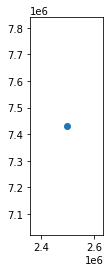

In [ ]:
# Before creation of buffer
airport_new.plot()

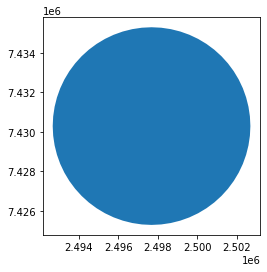

In [ ]:
# After creation of buffer
airport_buffer.plot()

#### 10. Query to find out how many roads intersect this buffer









##### a. Print the list of these roads.

> unary_union operation should be performed on polygon-based geodataframe. It is used to merge or dissolve overlapping polygons into a single polygon. It returns a single polygon object that represents the union of all the input polygons.

In [ ]:
# find all roads that intersect the buffer
intersections = roads[roads.geometry.intersects(airport_buffer.unary_union)]

In [ ]:
# Prints the number of roads intersecting the buffer
len(intersections)

640

##### b. Write the output to a new Shapefile



> We will write the output to .shp file using to_file() method. This creates other dependecy files as well.

In [ ]:
# Writing output to shapefile using driver as ESRI Shapefile
intersections.to_file('/content/drive/MyDrive/Colab Notebooks/roads_intersects_buffer.shp', driver='ESRI Shapefile')

## **References:**



* https://geopandas.org/en/stable/docs/reference.html

* https://shapely.readthedocs.io/en/stable/manual.html

* https://pandas.pydata.org/docs/reference/index.html
